## Business Understanding

Real estate agencies or property developers often struggle with accurately estimating house prices based on key features such as size, location, or other amenities. 
Incorrect pricing can lead to financial losses, reduced customer satisfaction, or extended property holding periods.

# Data Understanding

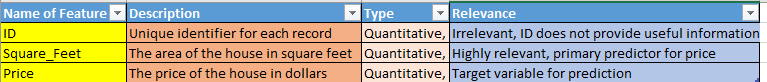





In [4]:
import pandas as pd # For Data Manipulation and Data Preprocessing
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt # For Data Visualization 
import seaborn as sns # For Advanced Data Visualization
import warnings # For ignoring the Warnings
warnings.filterwarnings("ignore") # For filtering the Warnings we can use the 'filter_warning' method
from sklearn.linear_model import LinearRegression # importing LinearRegression value with linear_model
from sklearn.model_selection import train_test_split # For Data splitting into train test split
from sklearn.metrics import mean_squared_error,r2_score # For Data Evaluation we can import 'MSE','R2 score'

In [5]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\house_prices.csv")

In [6]:
df

,Square_Feet,Price
0,800,150000
1,1500,230000
2,2000,280000
3,2400,310000
4,3000,360000
5,3500,400000
6,4000,430000
7,4500,480000
8,5000,520000
9,5500,550000


# Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Square_Feet  10 non-null     int64
 1   Price        10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


# Descriptive Statistics

In [10]:
df.describe()

,Square_Feet,Price
count,10.000000,10.000000
mean,3220.000000,371000.000000
std,1553.347639,129653.384067
min,800.000000,150000.000000
25%,2100.000000,287500.000000
50%,3250.000000,380000.000000
75%,4375.000000,467500.000000
max,5500.000000,550000.000000


df.mean()

In [12]:
df.mode()

,Square_Feet,Price
0,800,150000
1,1500,230000
2,2000,280000
3,2400,310000
4,3000,360000
5,3500,400000
6,4000,430000
7,4500,480000
8,5000,520000
9,5500,550000


In [13]:
df.median()

Square_Feet      3250.0
Price          380000.0
dtype: float64

In [14]:
df.var()

Square_Feet    2.412889e+06
Price          1.681000e+10
dtype: float64

In [15]:
df.std()

Square_Feet      1553.347639
Price          129653.384067
dtype: float64

In [16]:
# Range
df.max()-df.min()

Square_Feet      4700
Price          400000
dtype: int64

In [17]:
df.skew()

Square_Feet   -0.057550
Price         -0.255597
dtype: float64

In [18]:
# Fourth Moment Business Decision 

In [19]:
df.kurt()

Square_Feet   -1.121272
Price         -0.835321
dtype: float64

## Univariate plot(bar,box,violin,histogram)

<Axes: ylabel='Count'>

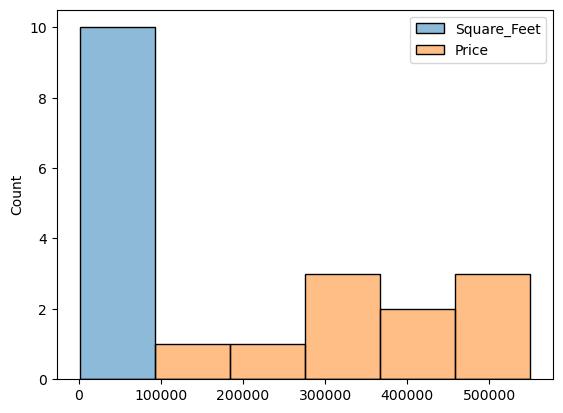

In [21]:
sns.histplot(df)

<Axes: >

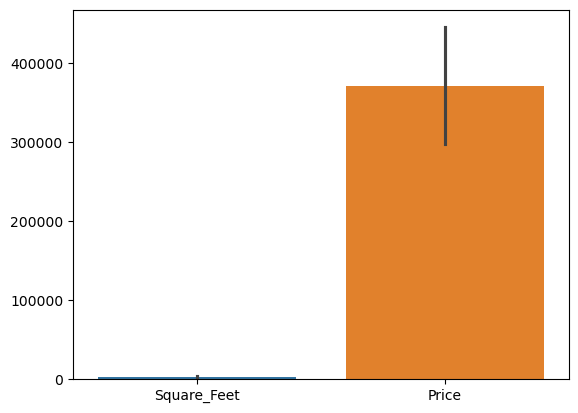

In [22]:
sns.barplot(df)

<Axes: >

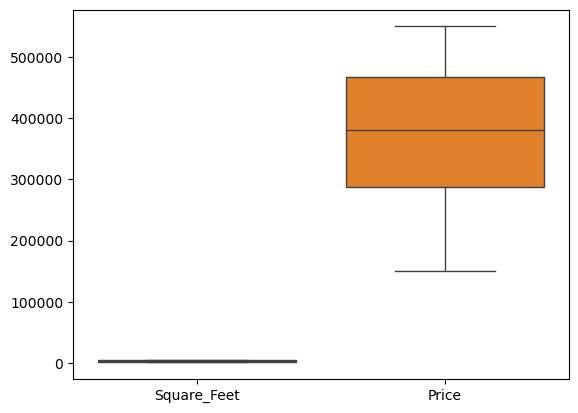

In [23]:
sns.boxplot(df)

<Axes: >

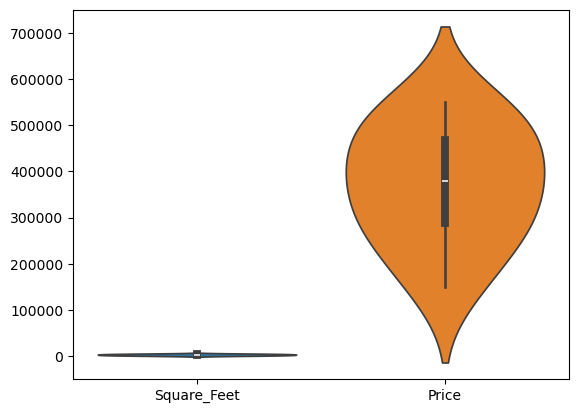

In [24]:
sns.violinplot(df)

## Bivariate plot(Scatterplot)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


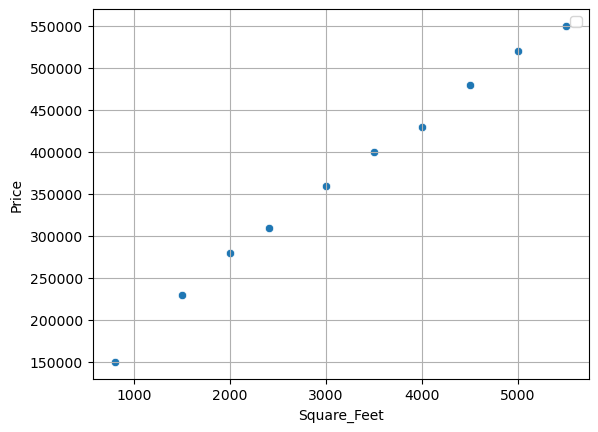

In [26]:
sns.scatterplot(x=df['Square_Feet'],y=df['Price'])
plt.grid()
plt.legend()
plt.plot()
plt.show()

## Multi variate plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


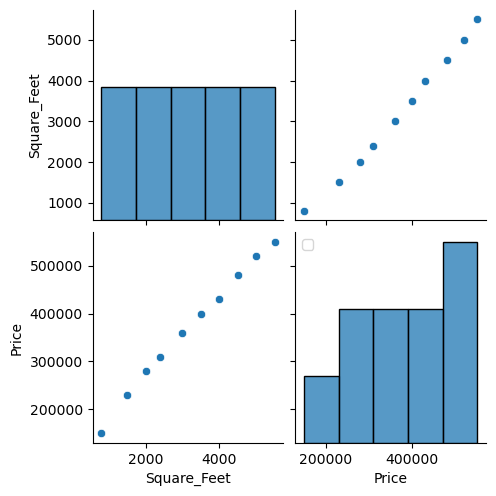

In [28]:
sns.pairplot(df)
plt.legend()
plt.show()

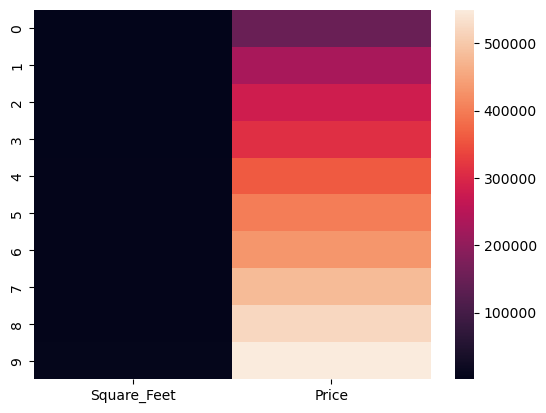

In [29]:
sns.heatmap(df)
plt.plot()
plt.show()

# Auto EDA

In [31]:
import sweetviz as sv
k=sv.analyze(df)
k.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [32]:
import dtale
d=dtale.show(df)
d.open_browser()

In [33]:
df.isnull().sum()

Square_Feet    0
Price          0
dtype: int64

# Model Building

In [35]:
X=df[['Square_Feet']] # Independent Variable
y=df['Price'] # Dependent Variable

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) # Split the data

In [37]:
# Model Building
model=LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred=model.predict(X_test)

In [40]:
y_pred

array([519065.83273194, 227188.67773234])

In [41]:
model.predict([[800]])

array([168813.24673242])

In [42]:
model.intercept_

102098.46844679659

In [43]:
model.coef_

array([83.39347286])

# Model Evaluation

In [45]:
r2=r2_score(y_test,y_pred)
print("R2 score value:",r2)
mse=mean_squared_error(y_test,y_pred)
print("Root Mean Squared Error",mse)

R2 score value: 0.9997912912871019
Root Mean Squared Error 4388100.688682288


# Data Visualization

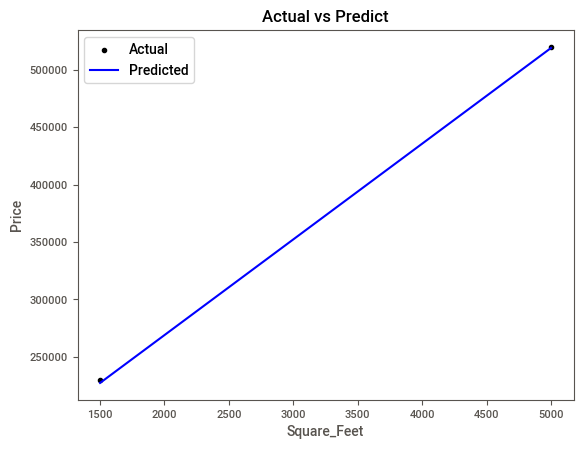

In [47]:
plt.scatter(X_test,y_test,color='black',label='Actual')
plt.plot(X_test,y_pred,color='blue',label='Predicted')
plt.xlabel("Square_Feet")
plt.ylabel("Price")
plt.title("Actual vs Predict")
plt.legend()
plt.show()

# Deployment

In [86]:
import joblib

# Save the model
joblib.dump(model, "simple_linear_regression_model.pkl")
print("Model saved as simple_linear_regression_model.pkl")

# Load the model (if needed)
loaded_model = joblib.load("simple_linear_regression_model.pkl")

Model saved as simple_linear_regression_model.pkl
